# Import Libraries

In [13]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
from sklearn.model_selection import train_test_split

# Load in the data

In [14]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), _ = mnist.load_data()
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [15]:
x_train.dtype

dtype('uint8')

# Extract first 10000 samples

In [16]:
X  = x_train[0:10000, :]

In [17]:
X.shape # N x T x D

(10000, 28, 28)

In [18]:
y = y_train[0:10000]

In [19]:
y.shape

(10000,)

# Perform Train test split

In [20]:
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.1)

In [21]:
train_data[0].shape  # shape of the first sample of train_data

(28, 28)

# Create the Model

In [22]:
i = Input(train_data[0].shape) # T x D. Here  T x D = 28 x 28
x = LSTM(128)(i)
x = Dense(10, activation='softmax')(x)
model = Model(i, x)

# Compile the Model

In [23]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the Model

In [24]:
hist = model.fit(train_data, train_labels, validation_data=(test_data, test_labels), epochs = 50)

Epoch 1/50
282/282 [==============================] - 15s 44ms/step - loss: 1.0473 - accuracy: 0.6580 - val_loss: 0.5826 - val_accuracy: 0.8000
Epoch 2/50
282/282 [==============================] - 13s 45ms/step - loss: 0.5244 - accuracy: 0.8242 - val_loss: 0.5161 - val_accuracy: 0.8190
Epoch 3/50
282/282 [==============================] - 13s 46ms/step - loss: 0.4222 - accuracy: 0.8560 - val_loss: 0.4392 - val_accuracy: 0.8390
Epoch 4/50
282/282 [==============================] - 13s 46ms/step - loss: 0.3649 - accuracy: 0.8760 - val_loss: 0.4054 - val_accuracy: 0.8550
Epoch 5/50
282/282 [==============================] - 13s 46ms/step - loss: 0.3341 - accuracy: 0.8896 - val_loss: 0.4073 - val_accuracy: 0.8620
Epoch 6/50
282/282 [==============================] - 13s 45ms/step - loss: 0.3020 - accuracy: 0.8978 - val_loss: 0.3643 - val_accuracy: 0.8710
Epoch 7/50
282/282 [==============================] - 13s 46ms/step - loss: 0.2665 - accuracy: 0.9081 - val_loss: 0.3754 - val_accuracy:

# Visualize the Model Performance

In [25]:
trainAcc = [100 * x for x in hist.history['accuracy']]
testAcc = [100 * x for x in hist.history['val_accuracy']]

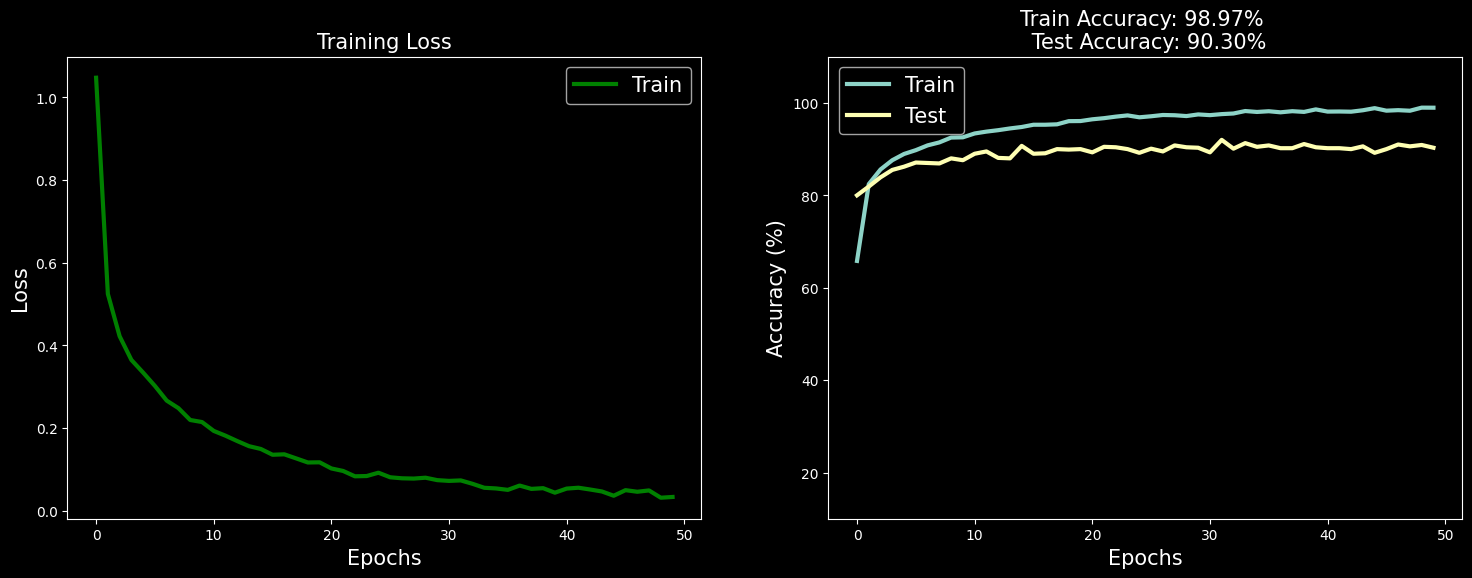

In [26]:
fig,ax = plt.subplots(1,2,figsize=(18,6))

ax[0].plot(hist.history['loss'], 'g', lw = 3, label = 'Train')
ax[0].set_xlabel('Epochs', fontsize = 15)
ax[0].set_ylabel('Loss', fontsize = 15)
ax[0].legend(fontsize = 15)
ax[0].set_title('Training Loss', fontsize = 15)


ax[1].plot(trainAcc, label ='Train', lw = 3)
ax[1].plot(testAcc, label ='Test', lw = 3)
ax[1].set_xlabel('Epochs', fontsize = 15)
ax[1].set_ylabel('Accuracy (%)', fontsize = 15)
ax[1].set_ylim([10,110])
ax[1].set_title(f'Train Accuracy: {trainAcc[-1]:.2f}% \n Test Accuracy: {testAcc[-1]:.2f}%', fontsize = 15)
ax[1].legend(fontsize = 15)

plt.show()